In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import sys
sys.path.append('../tools')
import clusterplot as cp
import clusterfit as cf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('/data1/yujiehe/data/tests/fixed_slope/fixed_slope_scan_best_fit_LX-T_θ60.csv')

In [3]:
df

,Glon,Glat,A,B,TotalScatter,n_sigma,sigma
0,-180.0,-90.0,1.494676,2.454,0.080,0.000000,0.000000
1,-180.0,-88.0,1.505036,2.454,0.080,-0.049268,0.639665
2,-180.0,-86.0,1.505036,2.454,0.080,-0.049140,0.641329
3,-180.0,-84.0,1.494676,2.454,0.080,-0.066563,0.629105
4,-180.0,-82.0,1.505036,2.454,0.080,-0.064786,0.650848
...,...,...,...,...,...,...,...
8095,176.0,80.0,1.557926,2.454,0.105,0.097981,0.645544
8096,176.0,82.0,1.547202,2.454,0.105,0.082412,0.637358
8097,176.0,84.0,1.547202,2.454,0.105,0.065460,0.644142
8098,176.0,86.0,1.547202,2.454,0.100,0.065273,0.645988


2.185889092303907
1.482056779541283
3.6952429230834256
1.6121761075353334
3.070938514702039
2.3423114841740067


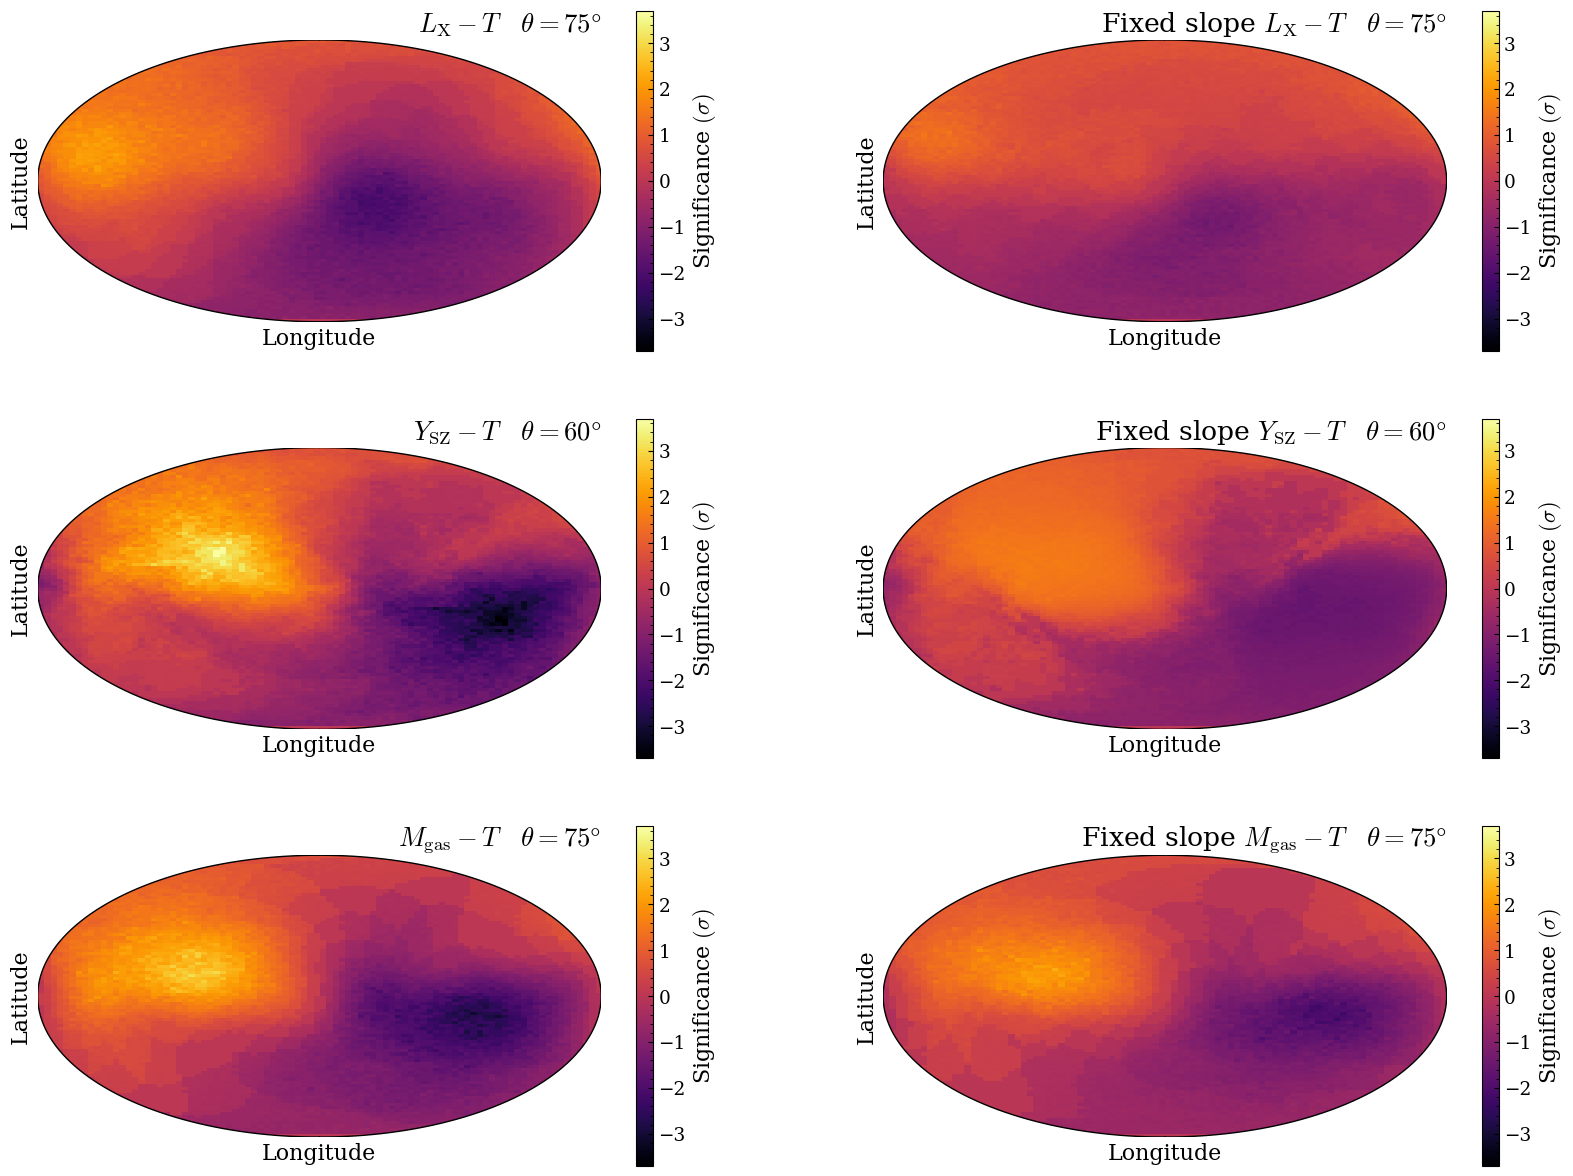

In [35]:
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
import pandas as pd

fig, ax = plt.subplots(3, 2, figsize=(20, 15))

files = ['../data/fits/testrun/lightcone0/scan_best_fit_LX-T_θ75.csv',
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_LX-T_θ75.csv', 
         '../data/fits/testrun/lightcone0/scan_best_fit_YSZ-T_θ60.csv',
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_YSZ-T_θ60.csv',
         '../data/fits/testrun/lightcone0/scan_best_fit_M-T_θ75.csv', 
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_M-T_θ75.csv', 
        ]

titles = ['$L_\\mathrm{{X}}-T\\quad\\theta=75\\degree$',
          'Fixed slope $L_\\mathrm{{X}}-T\\quad\\theta=75\\degree$',
          '$Y_\\mathrm{{SZ}}-T\\quad\\theta=60\\degree$',
          'Fixed slope $Y_\\mathrm{{SZ}}-T\\quad\\theta=60\\degree$',
          '$M_\\mathrm{{gas}}-T\\quad\\theta=75\\degree$',
          'Fixed slope $M_\\mathrm{{gas}}-T\\quad\\theta=75\\degree$',
        ]

idx = 0
for row in ax:
    for subax in row:
        df = pd.read_csv(files[idx])
        cp._sky_map_(df['n_sigma'], ax=subax, colorbar_label='Significance $(\\sigma)$',
                     vmin=-3.7,vmax=3.7)
        subax.set_title(titles[idx], loc='right')
        print(df['n_sigma'].max())
        idx += 1

plt.show()

66.57115741598369 69.6288425840163
67.03795496683075 69.16204503316924
64.89912021600296 71.30087978399703
64.77474081545307 71.42525918454692
67.15525964253177 69.04474035746821
67.34421636929433 68.85578363070566


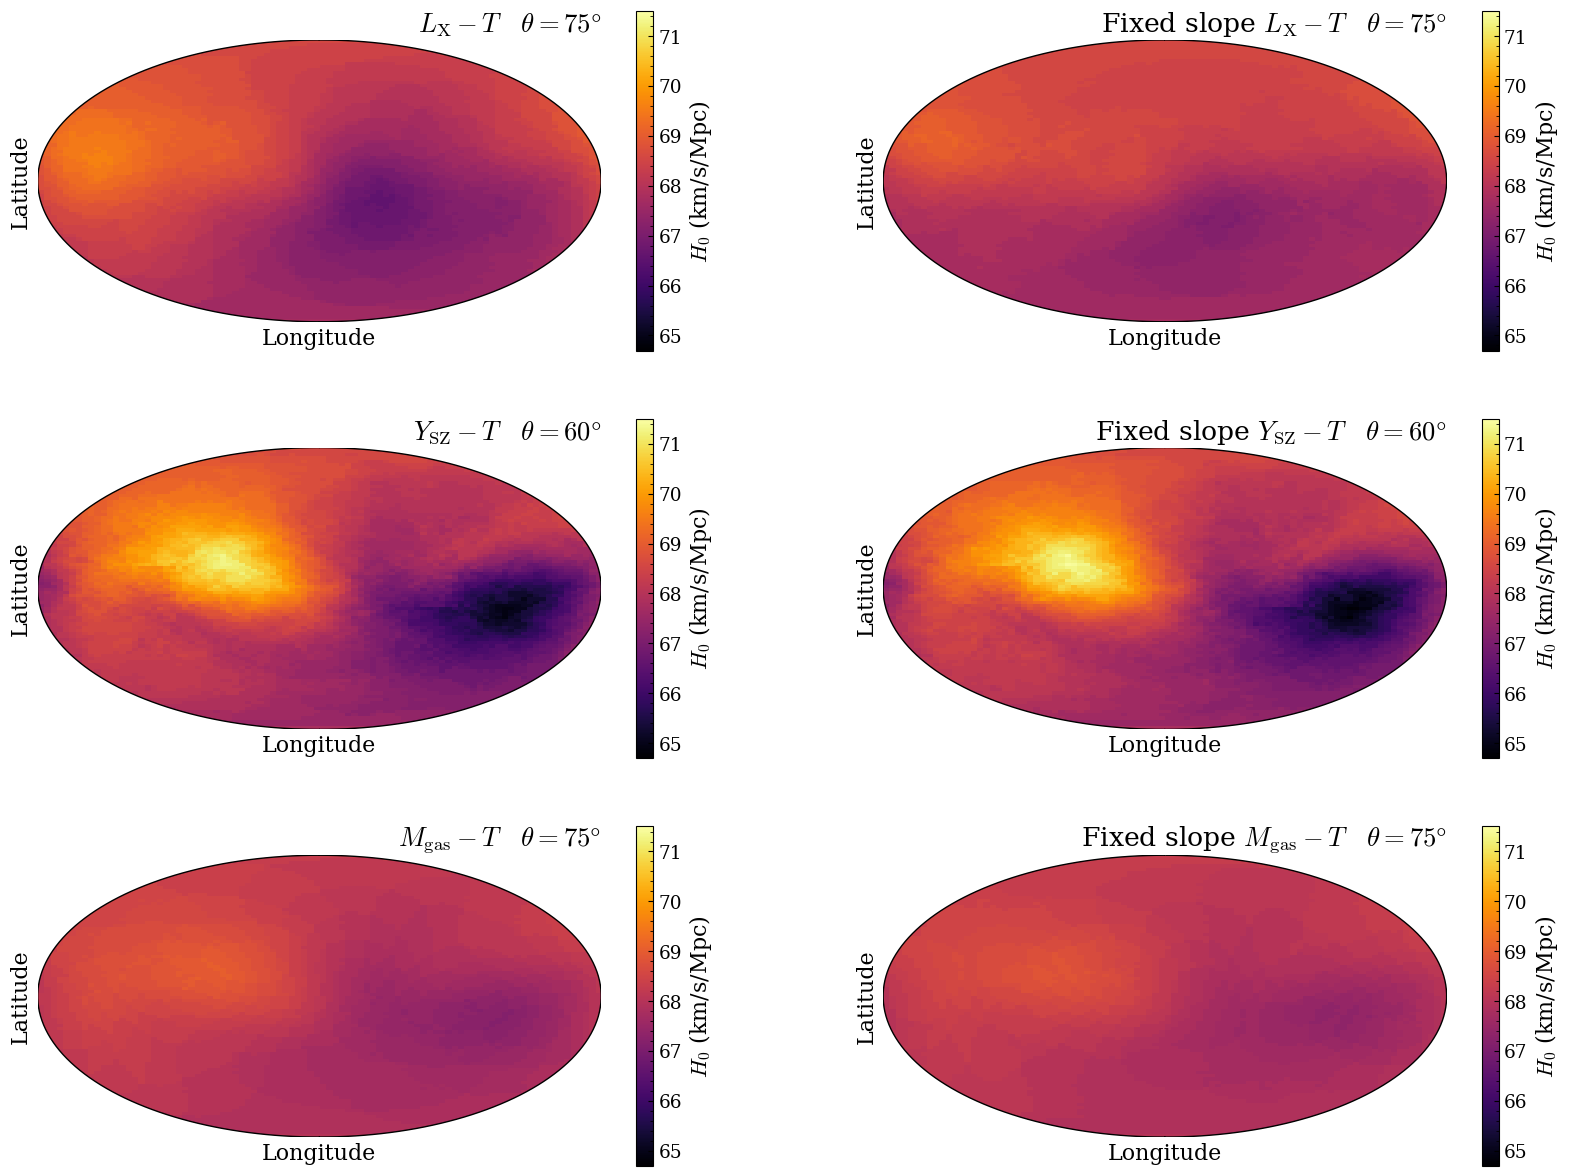

In [50]:
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
import pandas as pd

fig, ax = plt.subplots(3, 2, figsize=(20, 15))

files = ['../data/fits/testrun/lightcone0/scan_best_fit_LX-T_θ75.csv',
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_LX-T_θ75.csv', 
         '../data/fits/testrun/lightcone0/scan_best_fit_YSZ-T_θ60.csv',
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_YSZ-T_θ60.csv',
         '../data/fits/testrun/lightcone0/scan_best_fit_M-T_θ75.csv', 
         '../data/tests/fixed_slope/fixed_slope_scan_best_fit_M-T_θ75.csv', 
        ]

titles = ['$L_\\mathrm{{X}}-T\\quad\\theta=75\\degree$',
          'Fixed slope $L_\\mathrm{{X}}-T\\quad\\theta=75\\degree$',
          '$Y_\\mathrm{{SZ}}-T\\quad\\theta=60\\degree$',
          'Fixed slope $Y_\\mathrm{{SZ}}-T\\quad\\theta=60\\degree$',
          '$M_\\mathrm{{gas}}-T\\quad\\theta=75\\degree$',
          'Fixed slope $M_\\mathrm{{gas}}-T\\quad\\theta=75\\degree$',
        ]

idx = 0
for row in ax:
    for subax in row:
        df = pd.read_csv(files[idx])
        for key in cf.LC0_BEST_FIT.keys():
            if key in files[idx]:
                A_all = cf.LC0_BEST_FIT[key]['A']
                break
        
        # Convert A/A_all variation to H0 variation
        if 'LX-T' in files[idx] or 'YSZ-T' in files[idx]:
            H0 = (df['A']/A_all)**(1/2) * 68.1
        elif 'M-T' in files[idx]:
            H0 = (df['A']/A_all)**(2/5) * 68.1
        
        # Convert to H0 dipole variation
        H0 = cf._map_to_dipole_map_(H0, mid=68.1)
        print(np.min(H0), np.max(H0), (np.max(H0)-np.min(H0))/68.1)

        # Plot
        cp._sky_map_(H0, ax=subax, colorbar_label='$H_0$ (km/s/Mpc)', 
                     vmin=0.95*68.1, vmax=1.05*68.1)
        subax.set_title(titles[idx], loc='right')
        idx += 1

plt.show()